In [23]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
loansData=pd.read_csv('https://github.com/Thinkful-Ed/curric-data-001-data-sets/raw/master/loans/loansData.csv')
loansData.dropna(inplace=True)
loansData['Interest.Rate']=loansData['Interest.Rate'].str.strip('%').astype(float)
loansData['Yearly.Income']=loansData['Monthly.Income']*12
loansData['Home_Coded']=pd.Categorical(loansData['Home.Ownership']).codes

In [6]:
loansData[['Home.Ownership','Home_Coded']].tail()

,Home.Ownership,Home_Coded
23735,MORTGAGE,0
65882,OWN,2
55610,MORTGAGE,0
38576,RENT,3
3116,RENT,3


In [7]:
#Univariate Model
#int_rate = f(yearly.income)
model=smf.ols(formula='loansData["Interest.Rate"] ~ loansData["Yearly.Income"]',data=loansData)
results=model.fit()

print(results.summary())

#The model shows that yearly income is significant in predicting the interest rate for a loan but
#it doesn't match the data well (R-squared = 0)

                                OLS Regression Results                                
Dep. Variable:     loansData["Interest.Rate"]   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                 -0.000
Method:                         Least Squares   F-statistic:                    0.4168
Date:                        Sat, 16 Jul 2016   Prob (F-statistic):              0.519
Time:                                12:17:48   Log-Likelihood:                -7115.5
No. Observations:                        2498   AIC:                         1.424e+04
Df Residuals:                            2496   BIC:                         1.425e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------

In [8]:
#Multivariate Model
#int_rate = f(yearly.income)
model=smf.ols(formula='loansData["Interest.Rate"] ~ loansData["Yearly.Income"] + loansData["Home_Coded"]',data=loansData)
results=model.fit()

print(results.summary())

#The model shows that yearly income is significant while home ownership is not significant
#in predicting the interest rate for a loan. The model doesn't match the data well (R-squared = 0.007)

                                OLS Regression Results                                
Dep. Variable:     loansData["Interest.Rate"]   R-squared:                       0.007
Model:                                    OLS   Adj. R-squared:                  0.006
Method:                         Least Squares   F-statistic:                     8.274
Date:                        Sat, 16 Jul 2016   Prob (F-statistic):           0.000262
Time:                                12:17:48   Log-Likelihood:                -7107.5
No. Observations:                        2498   AIC:                         1.422e+04
Df Residuals:                            2495   BIC:                         1.424e+04
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------

In [9]:
#Multivariate Model
#int_rate = f(yearly.income, home_coded, yearly.income * home_coded)

model=smf.ols(formula='loansData["Interest.Rate"] ~ loansData["Yearly.Income"] * loansData["Home_Coded"]',data=loansData)
results=model.fit()

print(results.summary())

#The model shows that yearly income, home ownership and the interaction are significant in predicting the
#interest rate for a loan.  Home ownership was not significant in the previous model but it is now significant.
#The switch in significance is due to the interaction term.  Home ownership has to be included in the model to correctly
#describe the interaction term.  Additionally, R-squared is nearly zero so other significant variables are missing from
#this model.  Graphing the data illustrates the lack of fit of the model.

                                OLS Regression Results                                
Dep. Variable:     loansData["Interest.Rate"]   R-squared:                       0.008
Model:                                    OLS   Adj. R-squared:                  0.007
Method:                         Least Squares   F-statistic:                     6.588
Date:                        Sat, 16 Jul 2016   Prob (F-statistic):           0.000197
Time:                                12:17:48   Log-Likelihood:                -7105.9
No. Observations:                        2498   AIC:                         1.422e+04
Df Residuals:                            2494   BIC:                         1.424e+04
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                                                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------

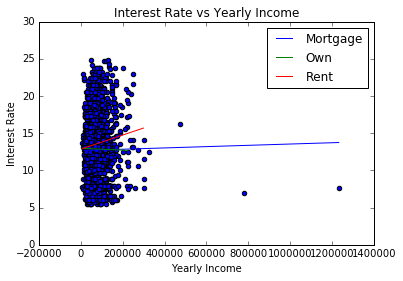

In [24]:
plt.scatter(loansData['Yearly.Income'],loansData['Interest.Rate'])

codes=[0,2,3]
for c in codes:
    hRate=loansData[loansData['Home_Coded']==c]['Interest.Rate']
    hIncome=sm.add_constant(loansData[loansData['Home_Coded']==c]['Yearly.Income'])
    model=sm.OLS(hRate,hIncome)
    results=model.fit()
    mIncome=range(int(min(hIncome['Yearly.Income'])),int(max(hIncome['Yearly.Income'])),1000)
    mRate=[float(results.params[0])+float(results.params[1])*x for x in mIncome]
    plt.plot(mIncome,mRate)

plt.title('Interest Rate vs Yearly Income')
plt.xlabel('Yearly Income')
plt.ylabel('Interest Rate')
plt.legend(['Mortgage','Own','Rent'])
plt.show()